In [2]:
from causallearn.graph.Edge import Edge
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.Dataset import load_dataset

D:\ProgramData\anaconda3\envs\tesi\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data, labels = load_dataset("boston_housing")

In [4]:
data

array([[6.3000e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7300e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7300e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0800e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0960e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7400e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]], shape=(506, 14))

In [5]:
g, edges = fci(data)
pdy = GraphUtils.to_pydot(g)
# pdy.write_png('boston_housing.png')

Depth=0, working on node 13: 100%|██████████| 14/14 [00:00<00:00, 332.96it/s]


X9 --> X1
X1 --> X12
X5 --> X3
X3 --> X10
X7 --> X5
X14 --> X6
X9 --> X10
X14 --> X11
X13 --> X14


In [6]:
# create an ENUM for the edge types
def get_endpoint_type(endpoint: int, isFirst: bool):
    if endpoint == -1:
        return "-"
    elif endpoint == 1:
        return "<" if isFirst else ">"
    elif endpoint == 2:
        return "o"

def get_edge(edge: Edge):
    start = edge.numerical_endpoint_1
    end = edge.numerical_endpoint_2

    return f"{get_endpoint_type(start, True)}-{get_endpoint_type(end, False)}"


In [7]:
sat_clauses = []
formatted_edges = []
for edge in edges:
    formatted_edges.append((edge.node1.name, edge.node2.name, get_edge(edge)))

print(formatted_edges)

[('X9', 'X1', '-->'), ('X1', 'X12', '-->'), ('X2', 'X8', 'o-o'), ('X2', 'X11', '-->'), ('X5', 'X3', '-->'), ('X8', 'X3', '-->'), ('X3', 'X9', '<->'), ('X3', 'X10', '-->'), ('X4', 'X14', 'o->'), ('X7', 'X5', '-->'), ('X8', 'X5', '-->'), ('X6', 'X13', '<->'), ('X14', 'X6', '-->'), ('X8', 'X7', '-->'), ('X7', 'X13', '<->'), ('X9', 'X10', '-->'), ('X9', 'X11', '<->'), ('X14', 'X11', '-->'), ('X13', 'X14', '-->')]


In [8]:
def get_unique_nodes(edges):
    nodes = set()
    for edge in edges:
        nodes.add(edge[0])
        nodes.add(edge[1])
    return nodes

In [9]:
nodes = get_unique_nodes(formatted_edges)

In [10]:
nodes

{'X1',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9'}

In [11]:
var_mapping = {}
def create_variable_mapping(nodes):
    for n1 in nodes:
        for n2 in nodes:
            for edge_type in ["direct", "latent"]:
                var_mapping[(n1, n2, edge_type)] = len(var_mapping) + 1
    return var_mapping

In [12]:
var_mapping = create_variable_mapping(nodes)

In [13]:
var_mapping

{('X6', 'X6', 'direct'): 1,
 ('X6', 'X6', 'latent'): 2,
 ('X6', 'X9', 'direct'): 3,
 ('X6', 'X9', 'latent'): 4,
 ('X6', 'X4', 'direct'): 5,
 ('X6', 'X4', 'latent'): 6,
 ('X6', 'X8', 'direct'): 7,
 ('X6', 'X8', 'latent'): 8,
 ('X6', 'X12', 'direct'): 9,
 ('X6', 'X12', 'latent'): 10,
 ('X6', 'X13', 'direct'): 11,
 ('X6', 'X13', 'latent'): 12,
 ('X6', 'X3', 'direct'): 13,
 ('X6', 'X3', 'latent'): 14,
 ('X6', 'X11', 'direct'): 15,
 ('X6', 'X11', 'latent'): 16,
 ('X6', 'X14', 'direct'): 17,
 ('X6', 'X14', 'latent'): 18,
 ('X6', 'X1', 'direct'): 19,
 ('X6', 'X1', 'latent'): 20,
 ('X6', 'X10', 'direct'): 21,
 ('X6', 'X10', 'latent'): 22,
 ('X6', 'X7', 'direct'): 23,
 ('X6', 'X7', 'latent'): 24,
 ('X6', 'X2', 'direct'): 25,
 ('X6', 'X2', 'latent'): 26,
 ('X6', 'X5', 'direct'): 27,
 ('X6', 'X5', 'latent'): 28,
 ('X9', 'X6', 'direct'): 29,
 ('X9', 'X6', 'latent'): 30,
 ('X9', 'X9', 'direct'): 31,
 ('X9', 'X9', 'latent'): 32,
 ('X9', 'X4', 'direct'): 33,
 ('X9', 'X4', 'latent'): 34,
 ('X9', 'X8',

In [14]:
def add_edge_constraints(edges):
    cnf = []
    for n1, n2, edge_type in edges:
            if edge_type == '-->':
                # Direct causation must be true
                cnf.append([var_mapping[(n1, n2, 'direct')]])
                # No latent common cause
                cnf.append([-var_mapping[(n1, n2, 'latent')]])

            elif edge_type == 'o->':
                # n2 cannot be ancestor of n1
                cnf.append([-var_mapping[(n2, n1, 'direct')]])

            elif edge_type == 'o-o':
                # Either direct causation or latent common cause must exist
                cnf.append([
                    var_mapping[(n1, n2, 'direct')],
                    var_mapping[(n1, n2, 'latent')]
                ])

            elif edge_type == '<->':
                # Must have latent common cause
                cnf.append([var_mapping[(n1, n2, 'latent')]])
                # No direct causation in either direction
                cnf.append([-var_mapping[(n2, n1, 'direct')]])
                cnf.append([-var_mapping[(n1, n2, 'direct')]])

    return cnf

In [15]:
cnf = add_edge_constraints(formatted_edges)

In [16]:
cnf

[[47],
 [-48],
 [261],
 [-262],
 [343, 344],
 [351],
 [-352],
 [377],
 [-378],
 [97],
 [-98],
 [172],
 [-41],
 [-171],
 [189],
 [-190],
 [-229],
 [335],
 [-336],
 [111],
 [-112],
 [12],
 [-141],
 [-11],
 [225],
 [-226],
 [107],
 [-108],
 [320],
 [-163],
 [-319],
 [49],
 [-50],
 [44],
 [-199],
 [-43],
 [239],
 [-240],
 [157],
 [-158]]

In [17]:
def decode_cnf(cnf, var_mapping):
    # Create reverse mapping
    reverse_mapping = {v: k for k, v in var_mapping.items()}

    decoded_clauses = []
    for clause in cnf:
        decoded_clause = []
        for literal in clause:
            # Get the absolute value of the literal to find the variable
            var_num = abs(literal)
            var_info = reverse_mapping[var_num]
            node1, node2, edge_type = var_info

            # Create readable representation
            if literal > 0:
                decoded_clause.append(f"{node1}-{edge_type}->{node2}")
            else:
                decoded_clause.append(f"NOT({node1}-{edge_type}->{node2})")

        decoded_clauses.append(decoded_clause)

    return decoded_clauses

# Function to pretty print the decoded CNF
def print_decoded_cnf(decoded_clauses):
    print("Interpreted CNF formula:")
    print("Each line represents a clause (OR between terms)")
    print("The entire formula is an AND between all clauses")
    print("\nClauses:")
    for i, clause in enumerate(decoded_clauses, 1):
        terms = " OR ".join(clause)
        print(f"{i}. {terms}")

# Use the functions
decoded = decode_cnf(cnf, var_mapping)
print_decoded_cnf(decoded)

Interpreted CNF formula:
Each line represents a clause (OR between terms)
The entire formula is an AND between all clauses

Clauses:
1. X9-direct->X1
2. NOT(X9-latent->X1)
3. X1-direct->X12
4. NOT(X1-latent->X12)
5. X2-direct->X8 OR X2-latent->X8
6. X2-direct->X11
7. NOT(X2-latent->X11)
8. X5-direct->X3
9. NOT(X5-latent->X3)
10. X8-direct->X3
11. NOT(X8-latent->X3)
12. X3-latent->X9
13. NOT(X9-direct->X3)
14. NOT(X3-direct->X9)
15. X3-direct->X10
16. NOT(X3-latent->X10)
17. NOT(X14-direct->X4)
18. X7-direct->X5
19. NOT(X7-latent->X5)
20. X8-direct->X5
21. NOT(X8-latent->X5)
22. X6-latent->X13
23. NOT(X13-direct->X6)
24. NOT(X6-direct->X13)
25. X14-direct->X6
26. NOT(X14-latent->X6)
27. X8-direct->X7
28. NOT(X8-latent->X7)
29. X7-latent->X13
30. NOT(X13-direct->X7)
31. NOT(X7-direct->X13)
32. X9-direct->X10
33. NOT(X9-latent->X10)
34. X9-latent->X11
35. NOT(X11-direct->X9)
36. NOT(X9-direct->X11)
37. X14-direct->X11
38. NOT(X14-latent->X11)
39. X13-direct->X14
40. NOT(X13-latent->X14)


In [18]:
from pysat.formula import CNF
from pysat.solvers import Glucose3

def solve_causal_sat(cnf_clauses, var_mapping):
    # Create a CNF formula object
    formula = CNF()
    for clause in cnf_clauses:
        formula.append(clause)

    # Create solver and add the formula
    solver = Glucose3()
    solver.append_formula(formula)

    # Solve the formula
    is_sat = solver.solve()

    if not is_sat:
        return False, None

    # Get the solution
    model = solver.get_model()

    # Create reverse mapping for interpretation
    reverse_mapping = {v: k for k, v in var_mapping.items()}

    # Interpret the solution
    causal_relationships = []
    for var in model:
        var_num = abs(var)
        if var_num in reverse_mapping:
            node1, node2, edge_type = reverse_mapping[var_num]
            if var > 0:  # If the variable is positive in the solution
                causal_relationships.append({
                    'from': node1,
                    'to': node2,
                    'type': edge_type,
                    'exists': True
                })
            else:  # If the variable is negative in the solution
                causal_relationships.append({
                    'from': node1,
                    'to': node2,
                    'type': edge_type,
                    'exists': False
                })

    # Clean up
    solver.delete()
    return True, causal_relationships

# Example usage:
satisfiable, solution = solve_causal_sat(cnf, var_mapping)

if satisfiable:
    print("Solution found!")
    print("\nCausal relationships:")
    # Group relationships by type for clearer output
    direct_causes = [rel for rel in solution if rel['type'] == 'direct' and rel['exists']]
    latent_causes = [rel for rel in solution if rel['type'] == 'latent' and rel['exists']]

    print("\nDirect causal relationships:")
    for rel in direct_causes:
        print(f"{rel['from']} --> {rel['to']}")

    print("\nLatent common causes:")
    for rel in latent_causes:
        print(f"{rel['from']} <-> {rel['to']}")
else:
    print("No solution exists - the constraints are unsatisfiable")

Solution found!

Causal relationships:

Direct causal relationships:
X9 --> X1
X9 --> X10
X8 --> X3
X8 --> X7
X8 --> X5
X13 --> X14
X3 --> X10
X14 --> X6
X14 --> X11
X1 --> X12
X7 --> X5
X2 --> X8
X2 --> X11
X5 --> X3

Latent common causes:
X6 <-> X13
X9 <-> X11
X3 <-> X9
X7 <-> X13


In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_causal_solution(solution, labels=None):
    """
    Create a visualization of the causal structure from SAT solution

    Args:
        solution: List of dictionaries containing causal relationships
        labels: Optional dictionary mapping variable indices to meaningful names
    """
    G = nx.DiGraph()

    # Add nodes and edges
    direct_edges = [(rel['from'], rel['to']) for rel in solution
                    if rel['type'] == 'direct' and rel['exists']]
    latent_edges = [(rel['from'], rel['to']) for rel in solution
                    if rel['type'] == 'latent' and rel['exists']]

    # Add all nodes first
    nodes = set([node for edge in direct_edges + latent_edges for node in edge])
    G.add_nodes_from(nodes)

    # Add direct edges
    G.add_edges_from(direct_edges)

    # Create the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=1000, alpha=0.7)

    # Draw direct edges
    nx.draw_networkx_edges(G, pos, edgelist=direct_edges,
                          edge_color='blue', arrows=True)

    # Draw latent edges differently (as dashed lines)
    for start, end in latent_edges:
        plt.plot([pos[start][0], pos[end][0]],
                [pos[start][1], pos[end][1]],
                'r--', alpha=0.5)

    # Add labels
    if labels is None:
        labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels)

    # Add legend
    plt.plot([], [], 'b-', label='Direct Causation')
    plt.plot([], [], 'r--', label='Latent Common Cause')
    plt.legend()

    plt.title('Discovered Causal Structure')
    plt.axis('off')
    return plt

def analyze_causal_structure(solution):
    """
    Analyze the causal structure to find important patterns and metrics
    """
    # Create directed graph from direct relationships
    G = nx.DiGraph()
    direct_edges = [(rel['from'], rel['to']) for rel in solution
                    if rel['type'] == 'direct' and rel['exists']]
    G.add_edges_from(direct_edges)

    analysis = {
        'root_causes': [node for node in G.nodes() if G.in_degree(node) == 0],
        'leaf_effects': [node for node in G.nodes() if G.out_degree(node) == 0],
        'mediators': [node for node in G.nodes()
                     if G.in_degree(node) > 0 and G.out_degree(node) > 0],
        'cycles': list(nx.simple_cycles(G)),
        'longest_path': nx.dag_longest_path(G) if nx.is_directed_acyclic_graph(G) else None,
        'confounders': [(rel['from'], rel['to']) for rel in solution
                       if rel['type'] == 'latent' and rel['exists']]
    }
    return analysis

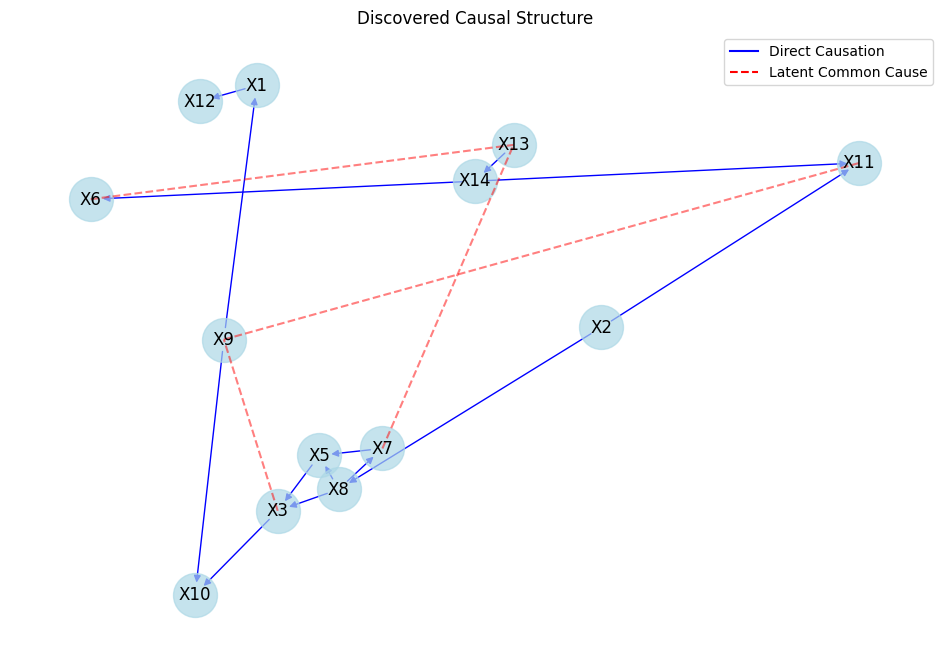

In [20]:
plt = visualize_causal_solution(solution)
plt.show()

In [21]:
analysis = analyze_causal_structure(solution)
print("Root causes:", analysis['root_causes'])
print("Ultimate effects:", analysis['leaf_effects'])
print("Mediating variables:", analysis['mediators'])
print("Confounders:", analysis['confounders'])

Root causes: ['X9', 'X13', 'X2']
Ultimate effects: ['X10', 'X6', 'X11', 'X12']
Mediating variables: ['X1', 'X8', 'X3', 'X7', 'X5', 'X14']
Confounders: [('X6', 'X13'), ('X9', 'X11'), ('X3', 'X9'), ('X7', 'X13')]
